In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
import matplotlib.pyplot as plt



In [4]:
# Load the dataset
file_path = 'D:/SCMA632__FIRE632/Stats/Assignment/A4/icecream.csv'
icecream_data = pd.read_csv(file_path)

# Prepare the data
numeric_data = icecream_data.iloc[:, 1:]  # Assuming the first column is non-numeric (Brand names)
scaled_data = StandardScaler().fit_transform(numeric_data)




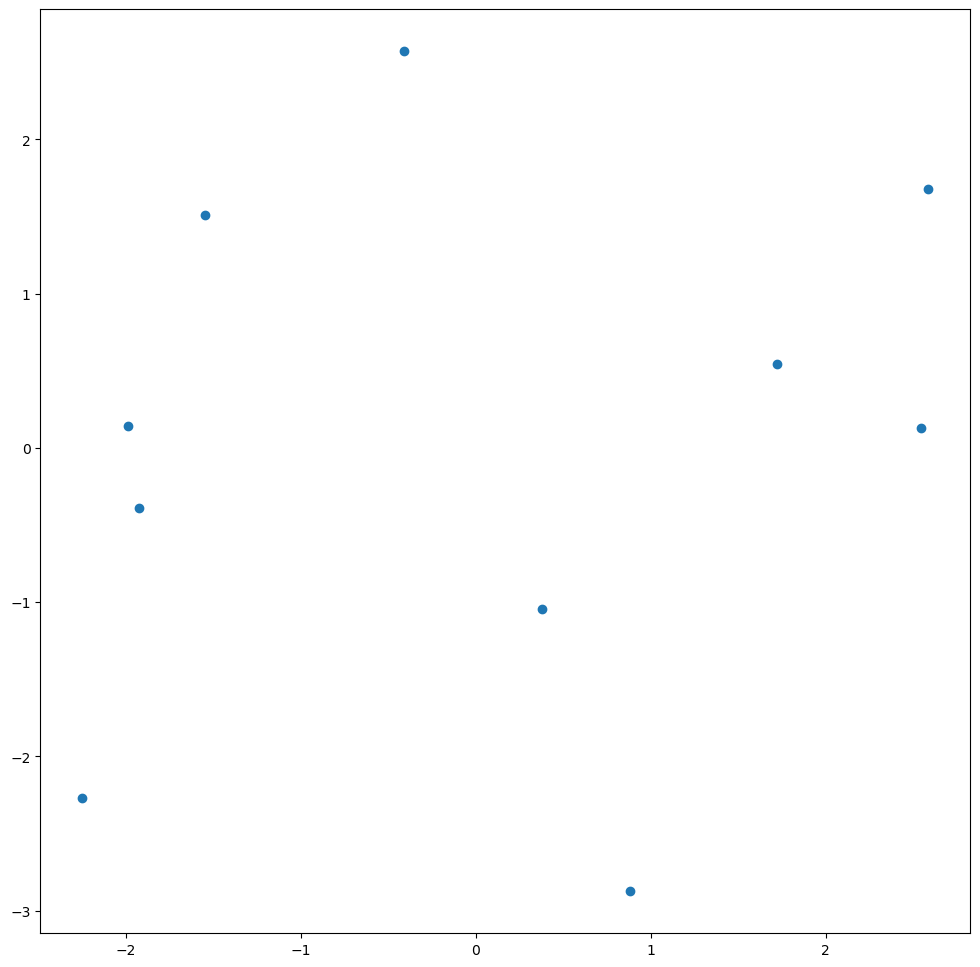

In [5]:
# Compute MDS
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=42, normalized_stress=False)
mds_points = mds.fit_transform(scaled_data)

# Create a DataFrame for the MDS results
mds_df = pd.DataFrame(mds_points, columns=['Dim1', 'Dim2'])
mds_df['Brand'] = icecream_data['Brand']

# Plot the MDS results
plt.figure(figsize=(12, 12))
plt.scatter(mds_df['Dim1'], mds_df['Dim2'])



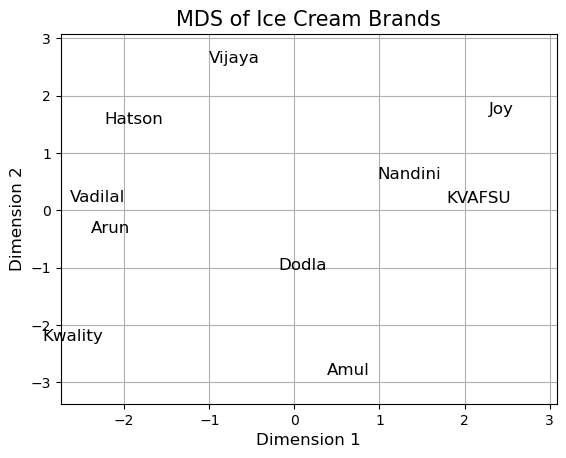

In [6]:
# Annotate points with brand names
for i in range(mds_df.shape[0]):
    plt.text(mds_df['Dim1'][i], mds_df['Dim2'][i], mds_df['Brand'][i], fontsize=12, ha='right')

# Set limits for the axes
plt.xlim(mds_df['Dim1'].min() - 0.5, mds_df['Dim1'].max() + 0.5)
plt.ylim(mds_df['Dim2'].min() - 0.5, mds_df['Dim2'].max() + 0.5)

plt.title('MDS of Ice Cream Brands', fontsize=15)
plt.xlabel('Dimension 1', fontsize=12)
plt.ylabel('Dimension 2', fontsize=12)
plt.grid(True)
plt.show()
